In [10]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers, Sequential
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255

In [12]:
autoencoder = Sequential()

In [13]:
autoencoder.add(layers.Conv2D(16, kernel_size=3, padding='same',
                              input_shape=(28, 28,1), activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2))
autoencoder.add(layers.Conv2D(8, kernel_size=3, activation='relu', padding='same'))                       
autoencoder.add(layers.MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [14]:
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same',
                              activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same',
                              activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(1, kernel_size=3, padding='same',
                              activation='sigmoid'))

autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 8, 8, 8)          

In [15]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128,
                validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 50s 107ms/step - loss: 0.2115 - val_loss: 0.1365
Epoch 2/50
469/469 [==============================] - 52s 111ms/step - loss: 0.1259 - val_loss: 0.1165
Epoch 3/50
469/469 [==============================] - 49s 106ms/step - loss: 0.1136 - val_loss: 0.1087
Epoch 4/50
469/469 [==============================] - 49s 105ms/step - loss: 0.1075 - val_loss: 0.1041
Epoch 5/50
469/469 [==============================] - 49s 105ms/step - loss: 0.1038 - val_loss: 0.1009
Epoch 6/50
469/469 [==============================] - 53s 113ms/step - loss: 0.1012 - val_loss: 0.0988
Epoch 7/50
469/469 [==============================] - 58s 124ms/step - loss: 0.0993 - val_loss: 0.0970
Epoch 8/50
469/469 [==============================] - 68s 145ms/step - loss: 0.0978 - val_loss: 0.0957
Epoch 9/50
469/469 [==============================] - 61s 131ms/step - loss: 0.0965 - val_loss: 0.0946
Epoch 10/50
469/469 [==============================] - 66s 142ms/step - l

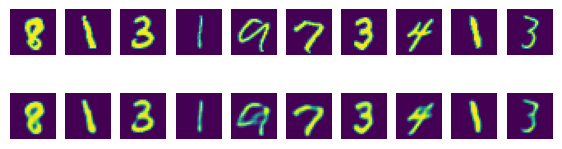

In [31]:
random_test = np.random.randint(X_test.shape[0], size=10)
ae_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(7, 2))
for i, image_idx in enumerate(random_test):
   ax = plt.subplot(2, 10, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))
   ax.axis('off')
   ax = plt.subplot(2, 10, 10 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))
   ax.axis('off')
plt.show()